# **Project #3: Reddit NLP - TVEC/NB Model
### DestinyTheGame vs. raidsecrets
*By Daniel Preston McBride*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import time

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
reddit = pd.read_csv('../data/reddit_data.csv')
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3838 non-null   int64 
 1   title      3838 non-null   object
 2   selftext   3838 non-null   object
dtypes: int64(1), object(2)
memory usage: 90.1+ KB


---
### Fitting X and y on train test split

In [3]:
X = reddit['selftext']
y = reddit['subreddit']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

---
### Creating pipeline with transformer and estimater.  Passing the pipeline with designated hyperparameters through gridsearchCV.  Utilized an appending DataFrame to compare adjustments to hyperparameters for each model ran.
*Referenced from 6.03-lesson-random-forest*

In [51]:
count = 0
model_params = {}

In [67]:
count = count
model_params = model_params

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

params = {
    'tvec__stop_words': [None],
    'tvec__ngram_range': [(1,2)],
    'tvec__max_features': [3300],
    'tvec__max_df': [0.7],
    'tvec__min_df': [4]
}

gs = GridSearchCV(estimator=pipe,
                 param_grid=params,
                 cv=5,
                 verbose=1)

gs.fit(X_train, y_train)

count += 1

gs.best_params_['best_score'] = gs.best_score_
gs.best_params_['train_score'] = gs.score(X_train, y_train)
gs.best_params_['test_score'] = gs.score(X_test, y_test)
model_params[f'model_{count}'] = gs.best_params_

model_df = pd.DataFrame.from_dict(model_params, orient='index')
model_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,tvec__max_df,tvec__max_features,tvec__min_df,tvec__ngram_range,tvec__stop_words,best_score,train_score,test_score
model_1,0.83,3000,4,"(1, 2)",None,0.815336,0.848846,0.812500
model_2,0.83,3000,4,"(1, 2)",None,0.815336,0.848846,0.812500
model_3,0.81,3200,3,"(1, 2)",english,0.815334,0.856292,0.806424
model_4,0.81,3200,3,"(1, 2)",None,0.815708,0.851080,0.810764
model_5,0.79,3200,3,"(1, 2)",None,0.815708,0.851080,0.810764
model_6,0.77,3300,4,"(1, 2)",None,0.817198,0.851080,0.813368
model_7,0.75,3300,4,"(1, 2)",None,0.817198,0.851080,0.813368
model_8,0.70,3300,4,"(1, 2)",None,0.817198,0.851080,0.813368
model_9,0.70,3300,4,"(1, 2)",None,0.817198,0.851080,0.813368
model_10,0.70,3300,4,"(1, 2)",None,0.817198,0.851080,0.813368


In [68]:
gs.best_params_

{'tvec__max_df': 0.7,
 'tvec__max_features': 3300,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None,
 'best_score': 0.8171979813503354,
 'train_score': 0.8510796723752793,
 'test_score': 0.8133680555555556}

---
### Checking scores against the baseline score; Visualizing probability metrics with confusion matrix

In [54]:
y.value_counts(normalize=True)

1    0.505732
0    0.494268
Name: subreddit, dtype: float64

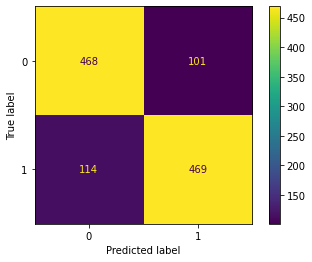

In [66]:
plot_confusion_matrix(gs, X_test, y_test);